# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.

The simplest legend can be created with the `plt.legend()`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy

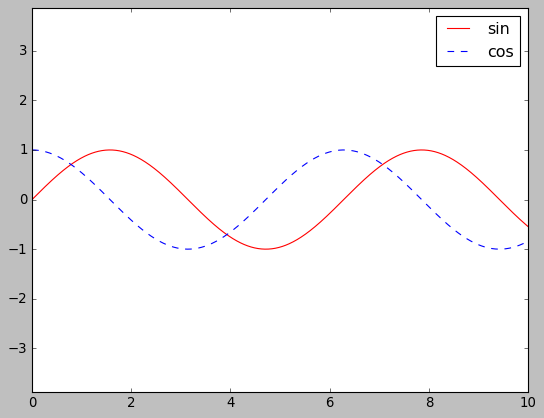

In [4]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), 'r-', label='sin')
ax.plot(x, np.cos(x), 'b--', label='cos')
ax.axis('equal')
legend = ax.legend()

Customization:

- Location

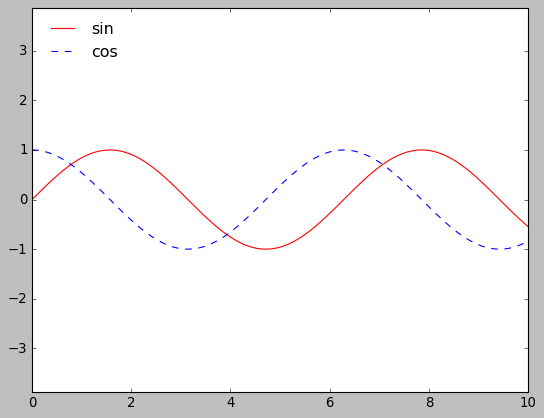

In [6]:
ax.legend(loc='upper left', frameon=False)
fig

- Use `ncol` command to specify the number of columns in the legend

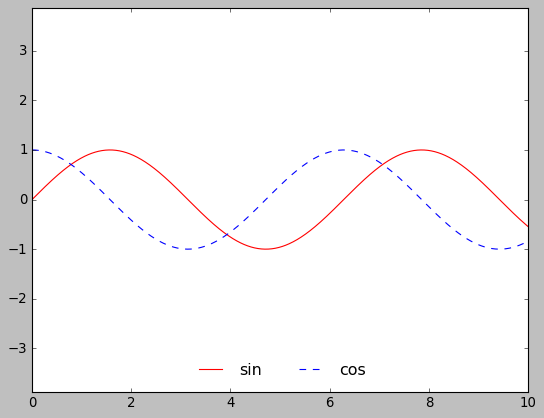

In [7]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Use a rounded box (`fancybox`) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text

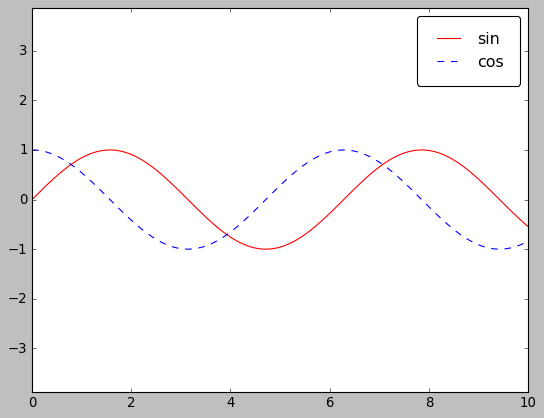

In [13]:
ax.legend(fancybox=True, framealpha=1, 
          shadow=False, borderpad=1)
fig

## Choose elements for the legend

The legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. 

The `plt.plot()` command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we'd like to specify.

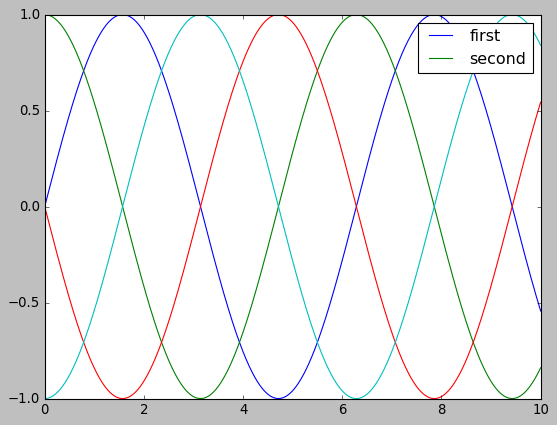

In [18]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

In practice it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend.

(By default, the legend ignores all elements without a `label` attribute set.)

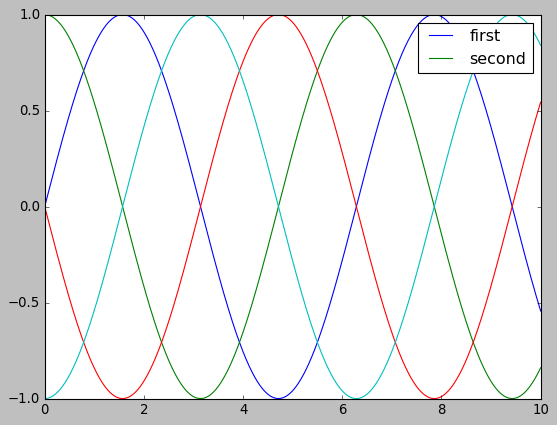

In [19]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization. For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.

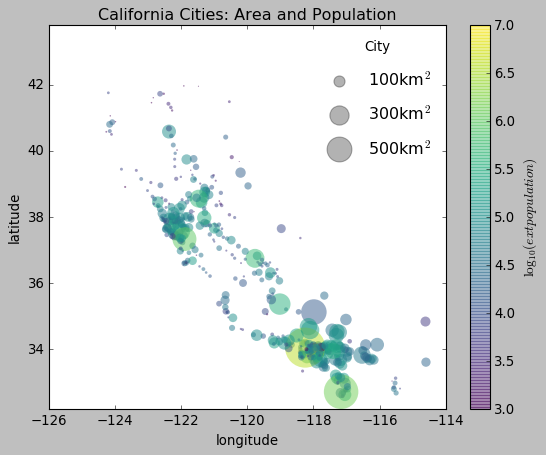

In [25]:
import pandas as pd

cities = pd.read_csv('../data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color, but NO label
plt.scatter(lon, lat, label=None, 
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='$\log_{10}(\text{population})$')
plt.clim(3, 7)
plt.title('California Cities: Area and Population')

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area)+'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City')



The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we **fake them by plotting empty lists**.

💡 By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

## Set color in legend manually

Obtain the legend handles using:

`leg.legendHandles`

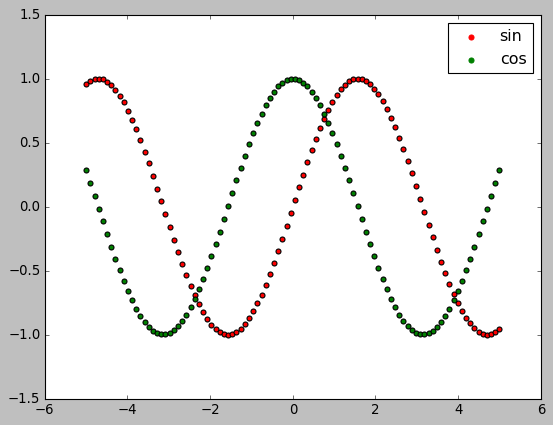

In [54]:
from matplotlib.lines import Line2D

x = np.linspace(-5, 5, 100)

plt.scatter(x, np.sin(x), c='r')
plt.scatter(x, np.cos(x), c='g')

for label in ['sin', 'cos']:
    plt.scatter([], [], label=label)

leg = plt.legend(scatterpoints=1)
leg.legendHandles[0].set_color('r')
leg.legendHandles[1].set_color('g')


## Multiple legends

We can work around multiple legends by creating a new legend artist from scratch, and then using the lower-level `ax.add_artist()` method to manually add the second artist to the plot:

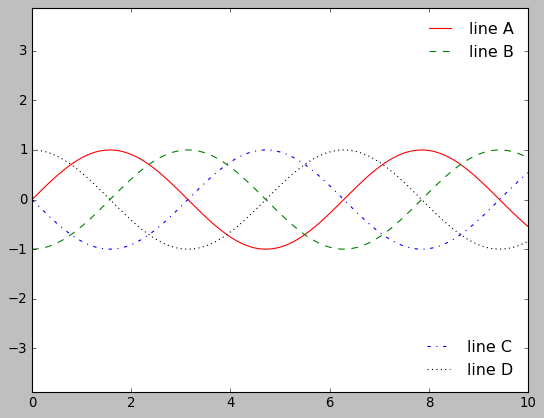

In [56]:
fig, ax = plt.subplots()

lines = []
styles = ['r-', 'g--', 'b-.', 'k:']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i])
    
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], 
          loc='upper right', frameon=False)

# create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);